In [1]:
import torch
import torchvision
import torchvision.transforms as transforms 

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


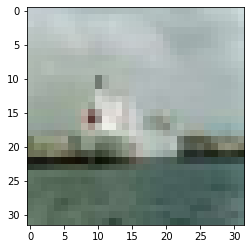

 ship


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [11]:
from torch.utils.data import Subset
import random
dog_idx, cat_idx = 5, 3
dog_indices = []
cat_indices = []

for i in range(len(trainset)):
    current_class = trainset[i][1]
    if current_class == dog_idx:
        dog_indices.append(i)
    elif current_class == cat_idx:
        cat_indices.append(i)
dog_ = dog_indices
cat_ = cat_indices
a = dog_+cat_
random.shuffle(a)
dog_vs_cat_train_dataset = Subset(trainset, a)#+other_indices)






dog_idx, cat_idx = 5, 3
dog_indices = []
cat_indices = []

for i in range(len(testset)):
    current_class = testset[i][1]
    if current_class == dog_idx:
        dog_indices.append(i)
    elif current_class == cat_idx:
        cat_indices.append(i)
ces = dog_indices
cat_ind = cat_indices
a = ces+cat_ind
random.shuffle(a)
dog_vs_cat_test_dataset = Subset(testset, a)#+other_indices)

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.conv3 = nn.Conv2d(16, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # x = F.relu(self.conv3(x))
        # x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dog_vs_cat_test_dataset, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), torch.tensor([data[1]]).to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs[None, ...])#.to(device)
        # print('inputs.shape',inputs.shape)
        # print('outputs.shape',outputs.shape)
        # print('labels.shape',labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.827
[2,  2000] loss: 0.706
[3,  2000] loss: 0.686
[4,  2000] loss: 0.669
[5,  2000] loss: 0.650
[6,  2000] loss: 0.631
[7,  2000] loss: 0.607
[8,  2000] loss: 0.575
[9,  2000] loss: 0.540
[10,  2000] loss: 0.492
[11,  2000] loss: 0.444
[12,  2000] loss: 0.394
[13,  2000] loss: 0.365
[14,  2000] loss: 0.338
[15,  2000] loss: 0.318
[16,  2000] loss: 0.283
[17,  2000] loss: 0.236
[18,  2000] loss: 0.214
[19,  2000] loss: 0.198
[20,  2000] loss: 0.182
Finished Training


In [16]:
PATH = './cifar_net_cat_vs_dog.pth'
torch.save(net.state_dict(), PATH)

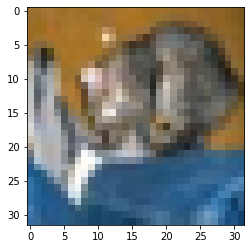

GroundTruth:    cat


In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [18]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [19]:
outputs = net(images)

In [20]:
 _, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

Predicted:    cat


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in dog_vs_cat_test_dataset:
        # print(data)
        images, labels = data
        # print(images)
        # images, labels = images.cuda(), labels.cuda()
        outputs = net(images[None, ...])#.cuda()
        # outputs.cuda()
        _, predicted = torch.max(outputs.data, 1)
        total += 1
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 92 %
